# Breast Cancer Prediction using Machine Learning

### Importing Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as po
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Data Pre-Processing

In [2]:
# Reading the CSV File
df = pd.read_csv('BRCA.csv')

In [3]:
# First 5 Rows of the Dataset
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
# Checking for Null/Empty Values in the Dataset
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [5]:
# Dropping the Null Values from the Dataset
df = df.dropna()

In [6]:
# Checking Again for Null Values
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [7]:
# Checking for Duplicated Values
df.duplicated().sum()

0

In [8]:
# Printing the columns in the Dataset
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [9]:
# Information Regarding the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

### Data Visualization

In [10]:
# Printing the Values of Tumour Stage Column
df['Tumour_Stage'].value_counts().sort_values()

Tumour_Stage
I       60
III     77
II     180
Name: count, dtype: int64

In [11]:
# Assigning the Values to new variable for Representation Purposes
tm_sg = df['Tumour_Stage'].value_counts().sort_values()
tm = tm_sg.index
sg = tm_sg.values

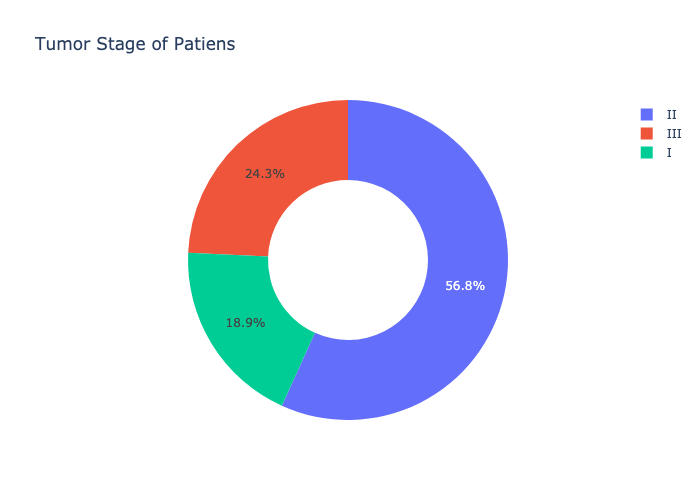

In [12]:
# Pie Chart for Tumor Stages
figure = px.pie(df,values = sg, names = tm, hole = 0.5, title = 'Tumor Stage of Patiens')
figure.show('png')

In [13]:
# Printing the Values of Histology Column
df['Histology'].value_counts().sort_values()

Histology
Mucinous Carcinoma                 12
Infiltrating Lobular Carcinoma     81
Infiltrating Ductal Carcinoma     224
Name: count, dtype: int64

In [14]:
# Assigning the Values to new variable for Representation Purposes
hist = df['Histology'].value_counts().sort_values()
histindex = hist.index
histvalues = hist.values

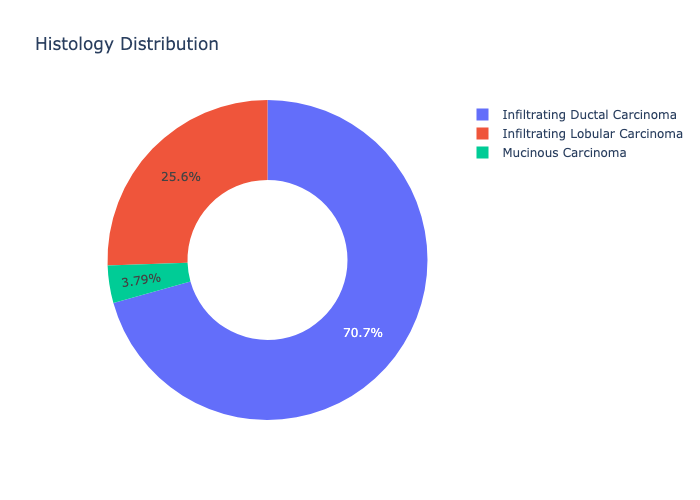

In [15]:
# Pie Chart for Histology 
fig = px.pie(df, values = histvalues, names = histindex, hole=0.5, title='Histology Distribution')
fig.show('png')

In [16]:
# Printing the Values of Surgery Type Column
df['Surgery_type'].value_counts().sort_values()

Surgery_type
Simple Mastectomy              65
Lumpectomy                     66
Modified Radical Mastectomy    89
Other                          97
Name: count, dtype: int64

In [17]:
# Assigning the Values to new variable for Representation Purposes
st = df['Surgery_type'].value_counts().sort_values()
stindex = st.index
stvalues = st.values

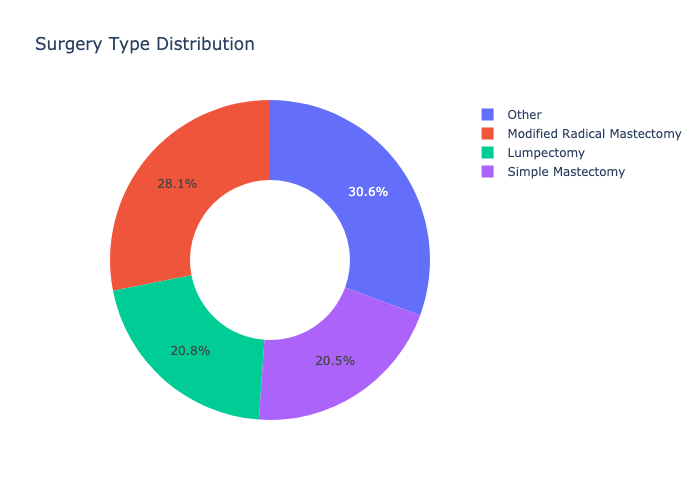

In [18]:
# Pie Chart for Surgery Type
fig2 = px.pie(df, values = stvalues, names=stindex, hole=0.5, title ='Surgery Type Distribution')
fig2.show('png')

In [19]:
# Printing the Values of ER Status Column
df['ER status'].value_counts().sort_values()

ER status
Positive    317
Name: count, dtype: int64

In [20]:
# Printing the Values of PR Status Column
df['PR status'].value_counts().sort_values()

PR status
Positive    317
Name: count, dtype: int64

In [21]:
# Printing the Values of HER2 Status Column
df['HER2 status'].value_counts().sort_values()

HER2 status
Positive     29
Negative    288
Name: count, dtype: int64

In [22]:
# Printing the Values of Gender Column
df['Gender'].value_counts()

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64

In [23]:
# Mapping String Values to Numerical Values
df['ER status'] = df['ER status'].map({'Positive':1})
df['PR status'] = df['PR status'].map({'Positive':1})
df['HER2 status'] = df['HER2 status'].map({'Positive':1, 'Negative':0})
df['Tumour_Stage'] = df['Tumour_Stage'].map({'I':1, 'II':2, 'III':3})
df['Gender'] = df['Gender'].map({'FEMALE':1, 'MALE':0})
df['Patient_Status'] = df['Patient_Status'].map({'Alive':1, 'Dead':0})
df['Surgery_type'] = df['Surgery_type'].map({'Simple Mastectomy':1, 'Lumpectomy':2,'Modified Radical Mastectomy':3,'Other':4})
df['Histology'] = df['Histology'].map({'Mucinous Carcinoma':1, 'Infiltrating Lobular Carcinoma':2,'Infiltrating Ductal Carcinoma':3})

In [24]:
# Printing the Dataset with Changes
df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,1,0.080353,0.42638,0.54715,0.273680,3,3,1,1,0,3,15-Jan-17,19-Jun-17,1
1,TCGA-EW-A1OX,43.0,1,-0.420320,0.57807,0.61447,-0.031505,2,1,1,1,0,2,26-Apr-17,09-Nov-18,0
2,TCGA-A8-A079,69.0,1,0.213980,1.31140,-0.32747,-0.234260,3,3,1,1,0,4,08-Sep-17,09-Jun-18,1
3,TCGA-D8-A1XR,56.0,1,0.345090,-0.21147,-0.19304,0.124270,2,3,1,1,0,3,25-Jan-17,12-Jul-17,1
4,TCGA-BH-A0BF,56.0,1,0.221550,1.90680,0.52045,-0.311990,2,3,1,1,0,4,06-May-17,27-Jun-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36.0,1,0.231800,0.61804,-0.55779,-0.517350,3,3,1,1,1,1,11-Nov-19,09-Feb-20,0
330,TCGA-A8-A085,44.0,0,0.732720,1.11170,-0.26952,-0.354920,2,2,1,1,0,4,01-Nov-19,04-Mar-20,0
331,TCGA-A1-A0SG,61.0,1,-0.719470,2.54850,-0.15024,0.339680,2,3,1,1,0,2,11-Nov-19,18-Jan-21,0
332,TCGA-A2-A0EU,79.0,1,0.479400,2.05590,-0.53136,-0.188480,1,3,1,1,1,2,21-Nov-19,19-Feb-21,0


### Model Building

In [25]:
# Segregating the Data to X and Y and changing them To Numpy
x = df[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 
        'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
y = df[['Patient_Status']]
x = x.to_numpy()
y = y.to_numpy()

In [26]:
# Splitting the Data into Testing and Training Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10, random_state=42)

In [27]:
# Support Vector Classifier
model = SVC()
model.fit(x_train,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC()

In [28]:
# Printing X_test
x_test

array([[ 6.5000e+01,  1.0000e+00,  4.3553e-01,  7.7034e-01,  4.9368e-01,
         3.7432e-01,  3.0000e+00,  3.0000e+00,  1.0000e+00,  1.0000e+00,
         0.0000e+00,  3.0000e+00],
       [ 6.0000e+01,  1.0000e+00,  2.5287e-01,  2.2967e+00,  5.3244e-01,
         4.6291e-02,  3.0000e+00,  3.0000e+00,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  2.0000e+00],
       [ 5.0000e+01,  1.0000e+00, -6.2153e-02,  1.6120e+00, -4.7404e-01,
        -4.4448e-02,  2.0000e+00,  2.0000e+00,  1.0000e+00,  1.0000e+00,
         0.0000e+00,  1.0000e+00],
       [ 7.7000e+01,  1.0000e+00, -5.2832e-01,  1.6652e-01,  1.1926e-01,
        -4.3346e-01,  2.0000e+00,  2.0000e+00,  1.0000e+00,  1.0000e+00,
         0.0000e+00,  3.0000e+00],
       [ 7.1000e+01,  1.0000e+00, -2.2305e-01,  5.0594e-01, -3.4943e-01,
        -8.3530e-01,  2.0000e+00,  3.0000e+00,  1.0000e+00,  1.0000e+00,
         0.0000e+00,  2.0000e+00],
       [ 7.1000e+01,  1.0000e+00,  1.2758e-01,  8.1033e-01,  5.1345e-01,
        -1.0298e-01,  

In [29]:
# Printing Y_test
y_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1]])

In [30]:
# Making Predictions on the Testing Data
x_test_prediction = model.predict(x_test)
testing_accuracy_score = accuracy_score(x_test_prediction,y_test)

In [31]:
# Printing the Accuracy Score
print(testing_accuracy_score)

0.8125


In [32]:
# Classification Report 
report = classification_report(y_test,x_test_prediction, zero_division=0)

In [33]:
# Printing the Classification Report
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.90        26

    accuracy                           0.81        32
   macro avg       0.41      0.50      0.45        32
weighted avg       0.66      0.81      0.73        32



In [34]:
# Confusion Matrix
confusionmatrix = confusion_matrix(y_test,x_test_prediction)

In [35]:
# Printing Confusion Matrix
print(confusionmatrix)

[[ 0  6]
 [ 0 26]]


#### 1 ==> Alive
#### 0 ==> Dead

In [36]:
# Predicting with the values of the Parameters of the Dataset
features = np.array([[8.4000e+01,  0.0000e+00, -8.1872e-02,  1.7241e+00, -5.7335e-02,
         4.3025e-02,  3.0000e+00,  3.0000e+00,  1.0000e+00,  1.0000e+00,
         0.0000e+00,  3.0000e+00]])
print(model.predict(features))

[1]
